J’ai suivi une approche progressive afin d’améliorer progressivement les performances du modèle.
Le dernier bloc d’entraînement, situé à la fin du notebook, correspond au modèle final optimisé.


## 1- Data Analysis
### 1. Measure data quality
- **a)** Recherche de **doublons**
- **b)** Vérification des **valeurs manquantes (NaN)**
- **c)** Contrôle des **erreurs dans les labels et features**
- **d)** Détection d’**outliers**
- **e)** Étude de la **corrélation et redondance**
- **f)** Évaluation du **pouvoir prédictif (Mutual Information)**
- **g)** Analyse de la **balance des classes**

## 2- Data Preparation
### a) Basic Feature Engineering
### b) Split Data
### b) Encodage

## 3- Model Training and Evaluation
### 1. RandomForestClassifier
Plusieurs variantes ont été testées pour évaluer leur impact :
- **a)** Avec la colonne `Complain`
- **b)** Sans la colonne `Complain`
- **c)** En appliquant **SMOTE** pour équilibrer les classes

### 2. XGBoost

### 3. New Feature Engineering + XGBoost + Hyperparameters



# Data Analysis

Ces analyses ont permis de comprendre la structure du dataset et d’identifier les axes d’amélioration avant l’entraînement.

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:


train_path = "customer-churn-prediction-competition/train_data.csv"
test_path = "customer-churn-prediction-competition/test_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Taille du train_data :", train_df.shape) 
print("Taille du test_data  :", test_df.shape)

Taille du train_data : (8000, 18)
Taille du test_data  : (2000, 17)


### Train data

In [4]:
display(train_df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,9255,15601116,P'an,686,France,Male,32,6,0.00,2,1,1,179093.26,0,0,2,DIAMOND,510
1,1562,15766374,Leak,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0,0,4,PLATINUM,959
2,1671,15716994,Green,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1,1,4,SILVER,327
3,6088,15730759,Chukwudi,561,France,Female,27,9,135637.00,1,1,0,153080.40,1,1,2,SILVER,567
4,6670,15797900,Chinomso,517,France,Male,56,9,142147.32,1,0,0,39488.04,1,1,3,PLATINUM,727


In [5]:
train_df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

### Test data

In [58]:
display(test_df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,6253,15687492,Anderson,596,Germany,Male,32,3,96709.07,2,0,0,41788.37,0,1,GOLD,709
1,4685,15736963,Herring,623,France,Male,43,1,0.00,2,1,1,146379.30,0,2,SILVER,508
2,1732,15721730,Amechi,601,Spain,Female,44,4,0.00,2,1,0,58561.31,0,1,GOLD,281
3,4743,15762134,Liang,506,Germany,Male,59,8,119152.10,2,1,1,170679.74,0,2,SILVER,979
4,4522,15648898,Chuang,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0,5,SILVER,457


In [59]:
test_df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

## 1- Measure data quality

### a) Duplicates

In [60]:
train_df.duplicated().sum()

0

In [61]:
test_df.duplicated().sum()


0

### b) Missing values and Nan

In [ ]:
train_df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
test_df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### c) Check labels and feature error

#### Categorical columns

Vérifier les valeurs uniques afin de s’assurer qu’il n’y a pas d’erreurs ou de fautes de frappe dans les données.

In [ ]:
# for train
print("Categorical columns for train_df")
for col in train_df.select_dtypes(include='object'):
    print(f"{col}: {train_df[col].unique()}")  
    print(f"Number of unique values: {train_df[col].nunique()}\n")

Categorical columns for train_df
Surname: ["P'an" 'Leak' 'Green' ... 'Manners' 'Winn' 'Macrossan']
Number of unique values: 2618

Geography: ['France' 'Germany' 'Spain']
Number of unique values: 3

Gender: ['Male' 'Female']
Number of unique values: 2

Card Type: ['DIAMOND' 'PLATINUM' 'SILVER' 'GOLD']
Number of unique values: 4



In [ ]:
# for test
print("Categorical columns for test_df")
for col in test_df.select_dtypes(include='object'):
    print(f"{col}: {test_df[col].unique()}")  
    print(f"Number of unique values: {test_df[col].nunique()}\n")

Categorical columns for test_df
Surname: ['Anderson' 'Herring' 'Amechi' ... 'Jenks' 'Klein' 'Ndubuisi']
Number of unique values: 1158

Geography: ['Germany' 'France' 'Spain']
Number of unique values: 3

Gender: ['Male' 'Female']
Number of unique values: 2

Card Type: ['GOLD' 'SILVER' 'DIAMOND' 'PLATINUM']
Number of unique values: 4



#### Numerical columns

In [ ]:
# Pour train
print("train_df")
for col in train_df.select_dtypes(include=['int64', 'float64']):
    print(f"{col}: min={train_df[col].min()}, max={train_df[col].max()}, mean={train_df[col].mean():.2f}, std={train_df[col].std():.2f}\n")


train_df
RowNumber: min=2, max=10000, mean=5012.51, std=2887.65

CustomerId: min=15565701, max=15815660, mean=15690665.10, std=71847.43

CreditScore: min=350, max=850, mean=651.65, std=96.37

Age: min=18, max=92, mean=38.90, std=10.52

Tenure: min=0, max=10, mean=5.00, std=2.88

Balance: min=0.0, max=250898.09, mean=76102.14, std=62461.01

NumOfProducts: min=1, max=4, mean=1.53, std=0.58

HasCrCard: min=0, max=1, mean=0.70, std=0.46

IsActiveMember: min=0, max=1, mean=0.51, std=0.50

EstimatedSalary: min=90.07, max=199970.74, mean=100431.29, std=57518.92

Exited: min=0, max=1, mean=0.21, std=0.40

Complain: min=0, max=1, mean=0.21, std=0.40

Satisfaction Score: min=1, max=5, mean=3.01, std=1.40

Point Earned: min=163, max=1000, mean=606.77, std=224.95



In [ ]:

# Pour test
print("test_df")
for col in test_df.select_dtypes(include=['int64', 'float64']):
    print(f"{col}: min={test_df[col].min()}, max={test_df[col].max()}, mean={test_df[col].mean():.2f}, std={test_df[col].std():.2f}\n")

test_df
RowNumber: min=1, max=9999, mean=4952.47, std=2884.10

CustomerId: min=15565779, max=15815690, mean=15692042.45, std=72297.64

CreditScore: min=350, max=850, mean=646.05, std=97.69

Age: min=18, max=92, mean=39.02, std=10.36

Tenure: min=0, max=10, mean=5.05, std=2.93

Balance: min=0.0, max=216109.88, mean=78020.89, std=62134.22

NumOfProducts: min=1, max=4, mean=1.53, std=0.59

HasCrCard: min=0, max=1, mean=0.71, std=0.45

IsActiveMember: min=0, max=1, mean=0.52, std=0.50

EstimatedSalary: min=11.58, max=199992.48, mean=98726.04, std=57470.90

Complain: min=0, max=1, mean=0.20, std=0.40

Satisfaction Score: min=1, max=5, mean=3.02, std=1.41

Point Earned: min=119, max=1000, mean=605.51, std=229.83



=> Il n'y a pas d'erreur dans les labels et les features.

### d) Outliers 

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(train_df):
    outlier_dict = {}
    for col in train_df.select_dtypes(include='number').columns:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)][col]
        if not outliers.empty:
            outlier_dict[col] = outliers

         # Boxplot
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=train_df[col])
        plt.title(f"Boxplot de {col} (outliers: {len(outliers)})")
        plt.show()
    return outlier_dict


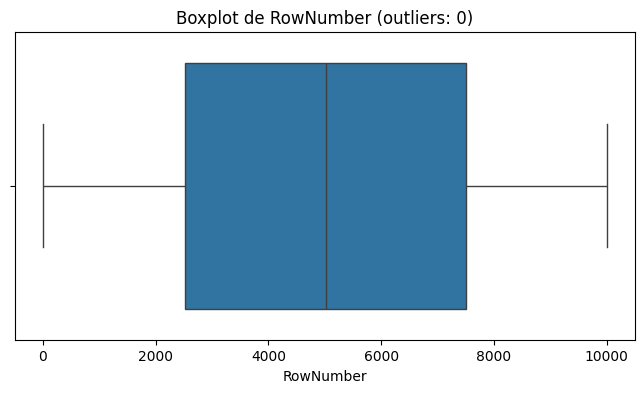

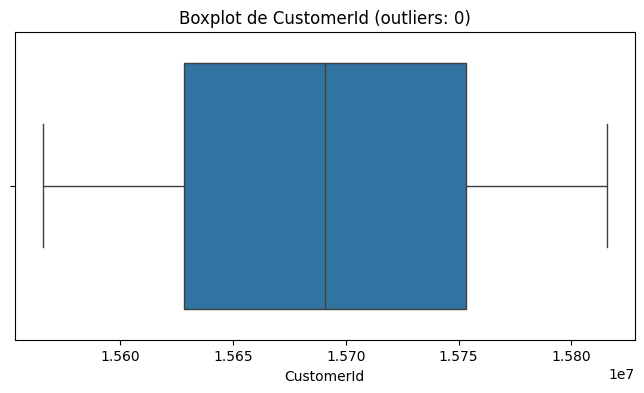

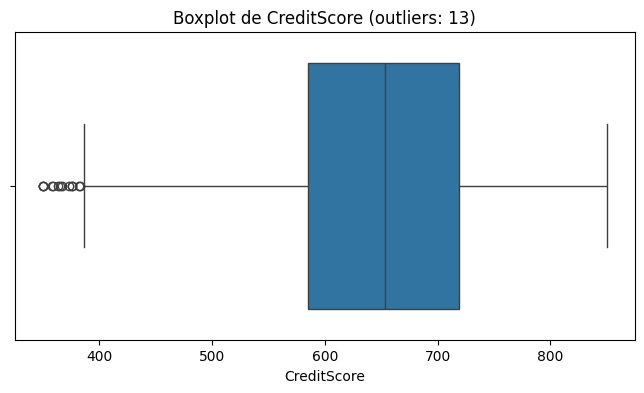

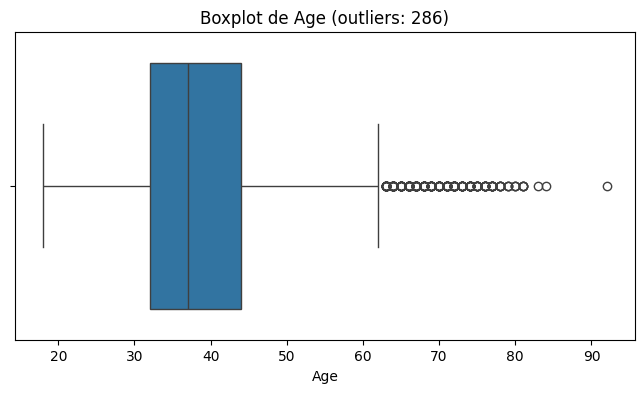

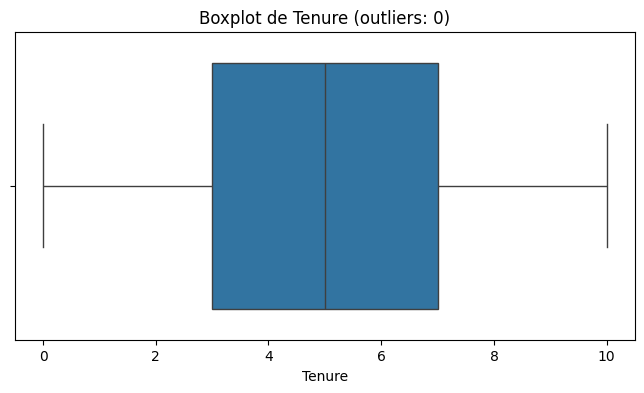

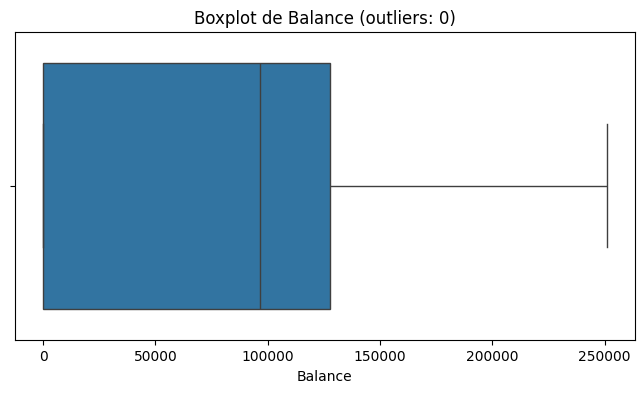

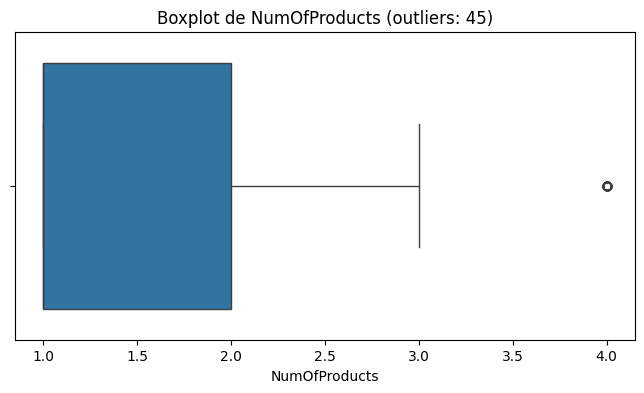

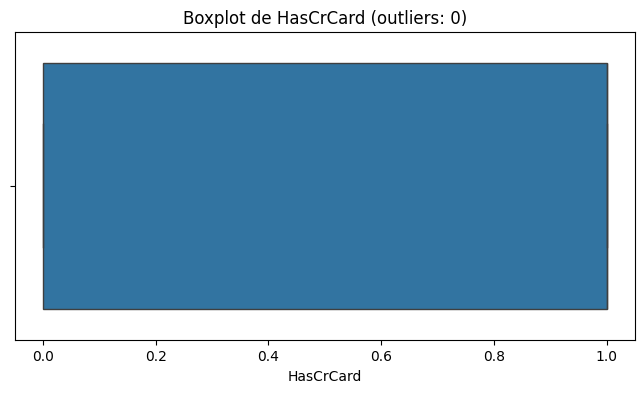

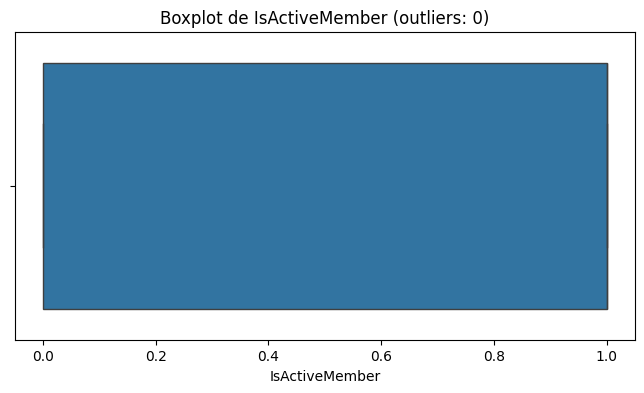

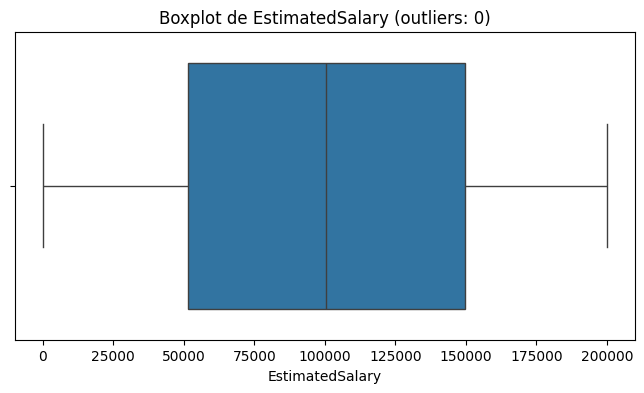

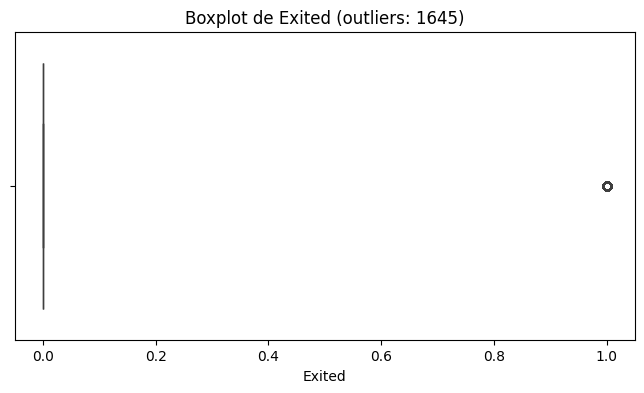

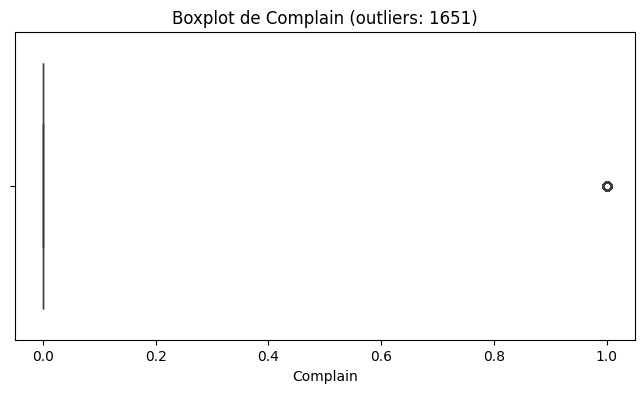

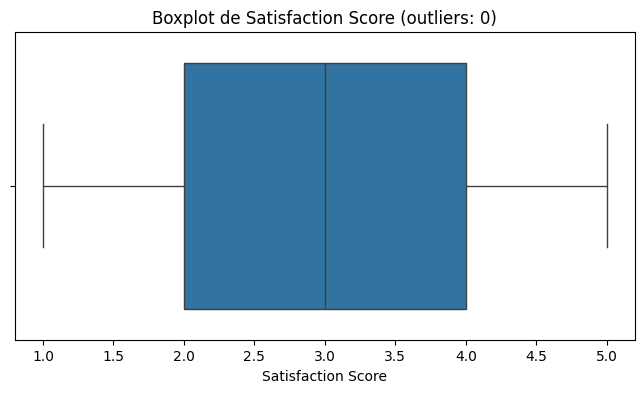

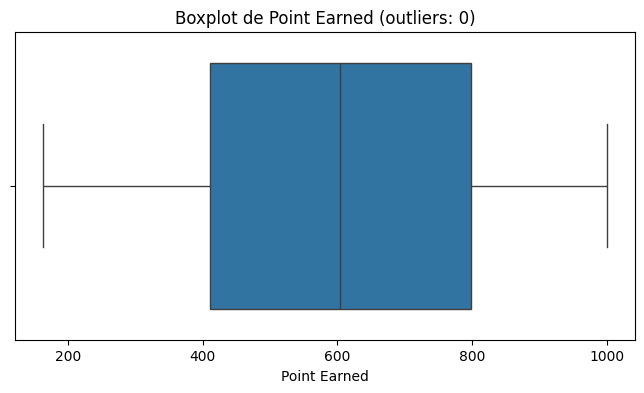

Colonne: CreditScore
268     358
778     363
981     373
987     359
1467    365
1985    382
3294    350
4588    376
5095    383
5311    376
7187    350
7366    350
7892    367
Name: CreditScore, dtype: int64
--------------------------------------------------
Colonne: Age
9       74
52      64
53      75
56      77
68      74
        ..
7933    68
7935    68
7954    72
7986    74
7988    63
Name: Age, Length: 286, dtype: int64
--------------------------------------------------
Colonne: NumOfProducts
340     4
507     4
695     4
739     4
818     4
1097    4
1317    4
1337    4
1342    4
1393    4
1458    4
1661    4
2133    4
2169    4
2351    4
2510    4
2523    4
2584    4
2746    4
3134    4
3252    4
3385    4
3474    4
3549    4
3577    4
4324    4
4401    4
4807    4
4866    4
5300    4
5302    4
5311    4
5432    4
5689    4
5797    4
6245    4
6875    4
6887    4
6925    4
7022    4
7432    4
7452    4
7566    4
7674    4
7947    4
Name: NumOfProducts, dtype: int64
-----------

In [ ]:
outliers_train = detect_outliers(train_df)

for col, out in outliers_train.items():
    print(f"Colonne: {col}")
    print(out)
    print("-"*50)

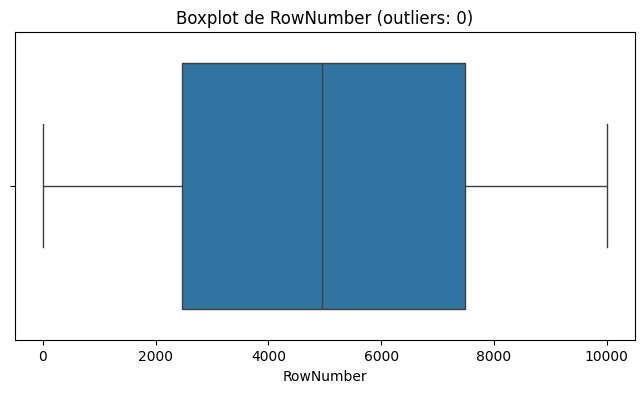

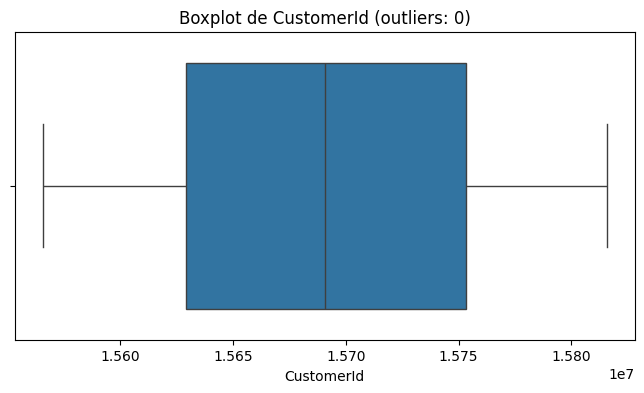

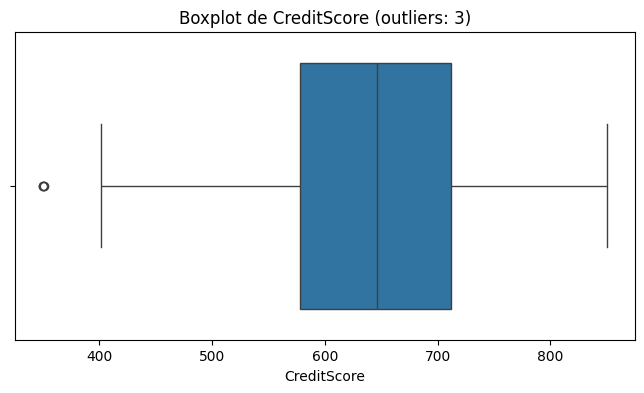

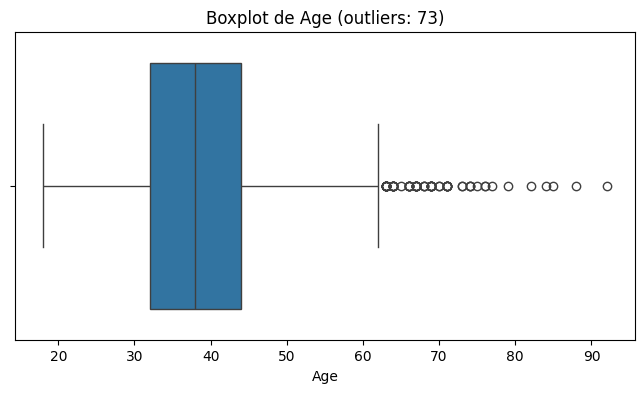

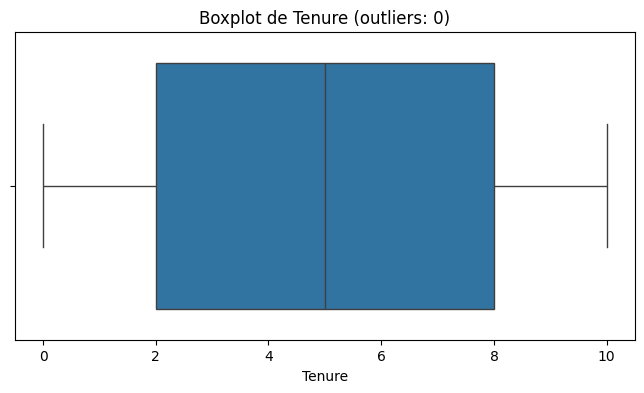

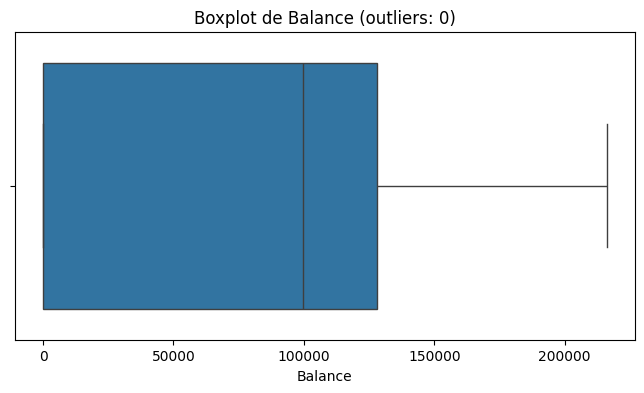

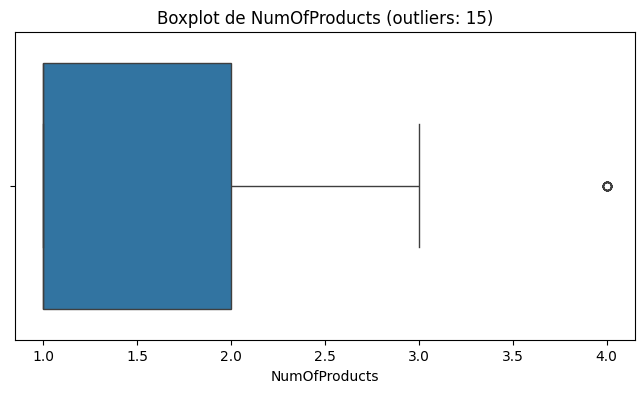

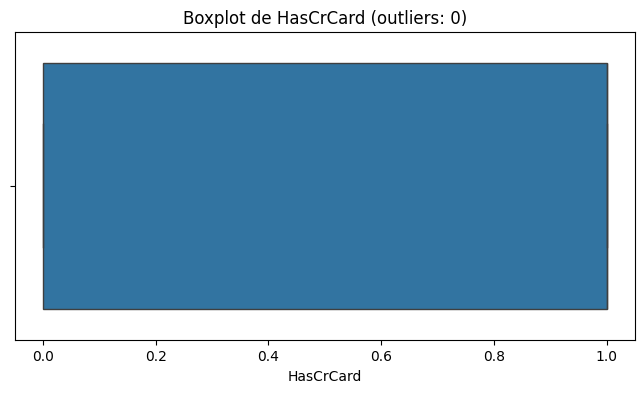

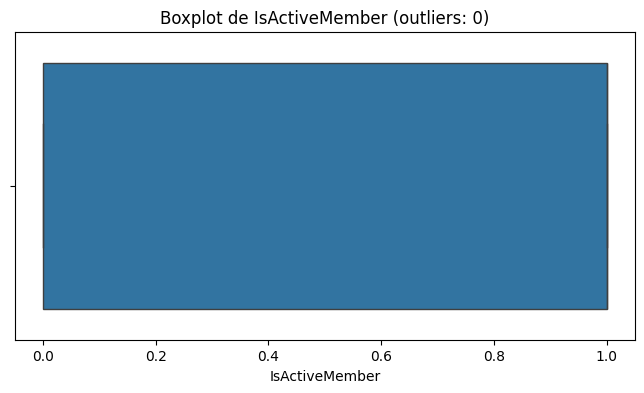

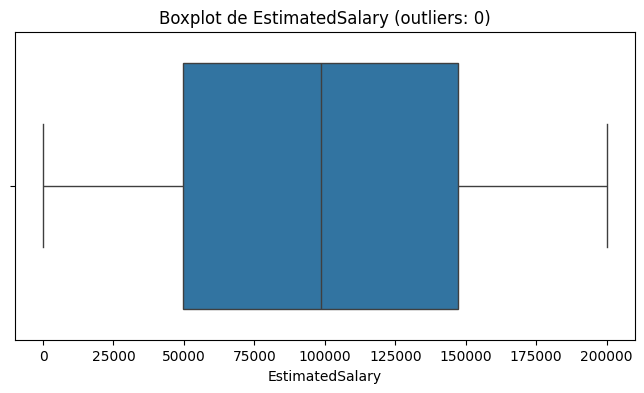

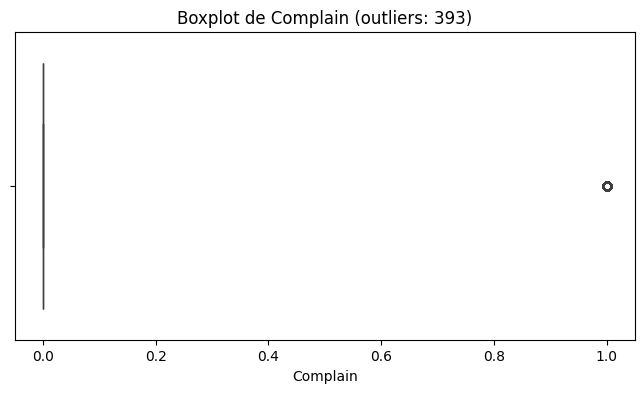

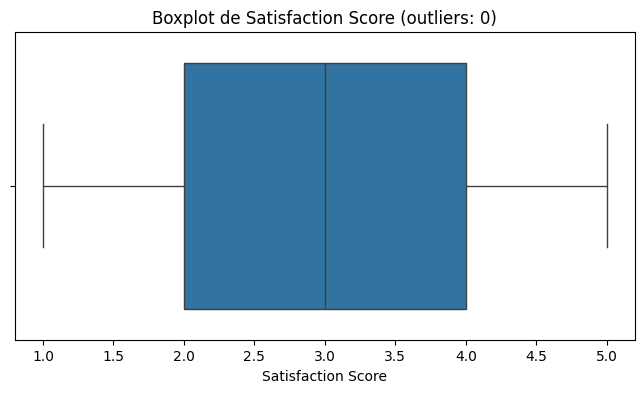

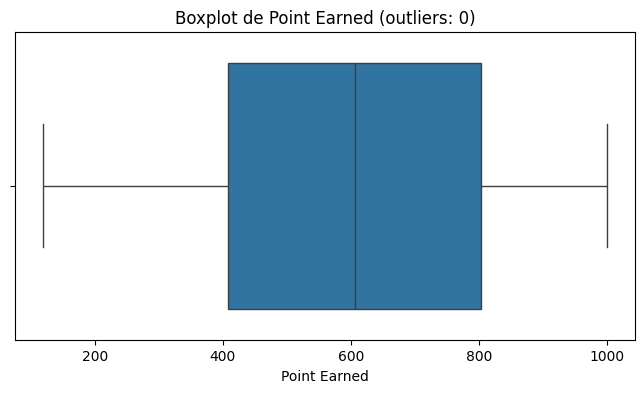

Colonne: CreditScore
494    350
844    350
976    351
Name: CreditScore, dtype: int64
--------------------------------------------------
Colonne: Age
67      68
81      66
149     64
172     71
191     75
        ..
1901    63
1907    66
1913    63
1923    74
1992    71
Name: Age, Length: 73, dtype: int64
--------------------------------------------------
Colonne: NumOfProducts
195     4
212     4
249     4
310     4
392     4
588     4
698     4
776     4
909     4
1164    4
1520    4
1550    4
1647    4
1696    4
1783    4
Name: NumOfProducts, dtype: int64
--------------------------------------------------
Colonne: Complain
7       1
10      1
11      1
12      1
22      1
       ..
1993    1
1995    1
1997    1
1998    1
1999    1
Name: Complain, Length: 393, dtype: int64
--------------------------------------------------


In [ ]:
outliers_test = detect_outliers(test_df)

for col, out in outliers_test.items():
    print(f"Colonne: {col}")
    print(out)
    print("-"*50)

### Commentaire:

Les valeurs aberrantes détectées ne sont pas des erreurs, mais plutôt des observations légitimes, simplement moins fréquentes dans le jeu de données. Elles sont donc conservées, car elles apportent des informations précieuses pour le modèle de prédiction du churn.

#### e) Correlation and redundancy

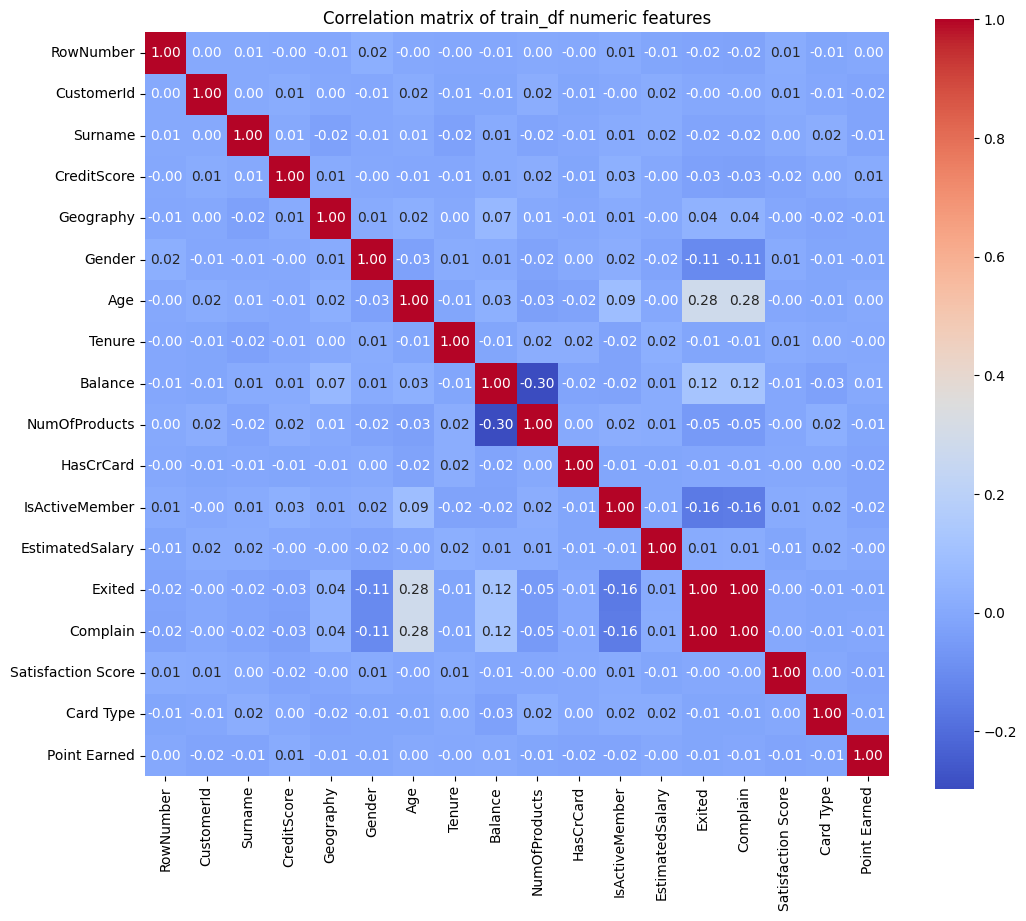

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

train_df_encoded = train_df.copy()

for col in train_df_encoded.select_dtypes(include=['object', 'category']).columns:
    train_df_encoded[col] = train_df_encoded[col].astype('category').cat.codes

corr = train_df_encoded.corr(numeric_only=True)  

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation matrix of train_df numeric features")
plt.show()


In [36]:
threshold = 0.9

strong_corr = []

for col1 in corr.columns:
    for col2 in corr.columns:
        if col1 != col2:
            corr_value = corr.loc[col1, col2]
            if abs(corr_value) > threshold:
                strong_corr.append((col1, col2, corr_value))

seen = set()
filtered_corr = []
for a, b, val in strong_corr:
    if (b, a) not in seen:
        filtered_corr.append((a, b, val))
        seen.add((a, b))

if filtered_corr:
    print("Strongly correlated feature pairs:\n")
    for col1, col2, corr_val in filtered_corr:
        print(f"{col1} ↔ {col2} : correlation = {corr_val:.3f}")
else:
    print("No strong correlations found.")


Strongly correlated feature pairs:

Exited ↔ Complain : correlation = 0.995


Cela indique simplement que la variable « Complain » possède un pouvoir prédictif.

### f) Predictive Power

En fonction des types de données, j’ai choisi d’utiliser la méthode `mutual_info_classif` pour évaluer le pouvoir prédictif de chaque variable. Cette approche permet de capturer des dépendances complexes et non linéaires.

In [ ]:
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder

X = train_df.drop('Exited', axis=1)
y = train_df['Exited']

for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

mi_scores = mutual_info_classif(X, y, discrete_features='auto')

mi = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi)


Complain              0.498026
NumOfProducts         0.079508
Age                   0.075134
Balance               0.016610
IsActiveMember        0.012832
Geography             0.010850
Gender                0.009772
Tenure                0.005986
CreditScore           0.005165
EstimatedSalary       0.003602
Card Type             0.002255
CustomerId            0.002246
HasCrCard             0.000173
Satisfaction Score    0.000000
RowNumber             0.000000
Surname               0.000000
Point Earned          0.000000
dtype: float64


/tmp/ipykernel_14191/107250148.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi.values, y=mi.index, palette='coolwarm')


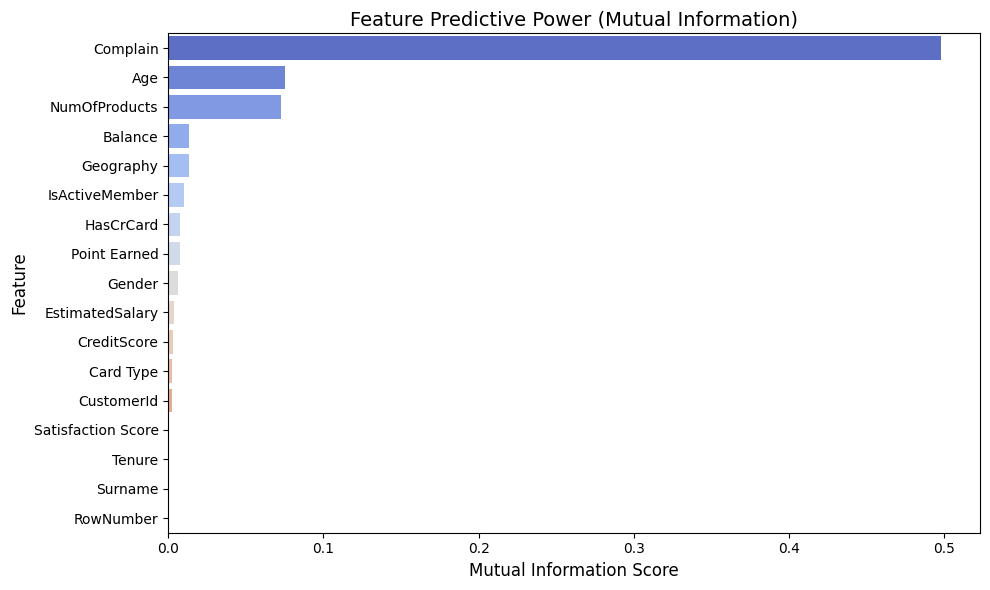

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=mi.values, y=mi.index, palette='coolwarm')
plt.title("Feature Predictive Power (Mutual Information)", fontsize=14)
plt.xlabel("Mutual Information Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


### g) Balance of classes

In [ ]:
train_df['Exited'].value_counts(normalize=True)

Exited
0    0.794375
1    0.205625
Name: proportion, dtype: float64

=> imbalanced

# Data preparation

## a) Basic feature engineering

#### Drop columns

Suppression des variables peu informatives :
`['Satisfaction score', 'RowNumber', 'Surname', 'Point Earned']`  
Cette étape vise à éliminer le bruit et réduire la dimensionnalité sans perte de pouvoir prédictif.

In [3]:

cols_to_drop = ['Satisfaction Score', 'RowNumber', 'Surname', 'Point Earned']

train_df = train_df.drop(columns=cols_to_drop)

test_df = test_df.drop(columns=cols_to_drop)

In [4]:
print("coloumns train_df :", train_df.columns)
print("columns test_df  :", test_df.columns)

coloumns train_df : Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Card Type'],
      dtype='object')
columns test_df  : Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Card Type'],
      dtype='object')


## b) Split data

Séparation du dataset en ensembles :
- **train** (pour l’apprentissage)
- **validation** (pour l’évaluation finale)

Cela garantit une évaluation indépendante des modèles.

In [5]:
print("Taille du train_data :", train_df.shape) 
print("Taille du test_data  :", test_df.shape)

Taille du train_data : (8000, 14)
Taille du test_data  : (2000, 13)


In [6]:
from sklearn.model_selection import train_test_split

# Separate features and label
X = train_df.drop('Exited', axis=1)
y = train_df['Exited']

# Split train / validation (80% / 20%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("X_train :", X_train.shape, "y_train :", y_train.shape)
print("X_val   :", X_val.shape, "y_val   :", y_val.shape)
print("test_df :", test_df.shape)  

print(y_train.head())


X_train : (6400, 13) y_train : (6400,)
X_val   : (1600, 13) y_val   : (1600,)
test_df : (2000, 13)
1921    1
7441    0
2755    0
6674    0
6233    0
Name: Exited, dtype: int64


## c) Encodage

In [15]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Categorical columns to be coded
cat_cols = ['Geography', 'Gender', 'Card Type']

# Create the encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit on the train
encoder.fit(X_train[cat_cols])

# Transform train, validation and test
X_train_encoded = encoder.transform(X_train[cat_cols])
X_val_encoded   = encoder.transform(X_val[cat_cols])
X_test_encoded  = encoder.transform(test_df[cat_cols])

# Convert to DataFrame with column names
encoded_cols = encoder.get_feature_names_out(cat_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_val_encoded   = pd.DataFrame(X_val_encoded, columns=encoded_cols, index=X_val.index)
X_test_encoded  = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=test_df.index)

# Delete the original categorical columns and concatenate the encoded columns
X_train = pd.concat([X_train.drop(columns=cat_cols), X_train_encoded], axis=1)
X_val   = pd.concat([X_val.drop(columns=cat_cols), X_val_encoded], axis=1)
X_test  = pd.concat([test_df.drop(columns=cat_cols), X_test_encoded], axis=1)

# Final check
print("X_train columns :", X_train.columns)
print("X_val columns   :", X_val.columns)
print("X_test columns  :", X_test.columns)


X_train columns : Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')
X_val columns   : Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')
X_test columns  : Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Geography_France', 'Geography_Germany', 'Geography_Spa

# Model Training and Evaluation

## 1- MOdel RandomFOrestClassifier

Plusieurs variantes ont été testées pour évaluer leur impact et bien suivre la progression:
- **a)** Avec la colonne `Complain`
- **b)** Sans la colonne `Complain`
- **c)** En appliquant **SMOTE** pour équilibrer les classes
- **d)** En appliquant **ADASYN** (autre méthode d’oversampling)

### a) still with 'Complain' - F1-score : 0.9939577039274925

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, accuracy_score

# Create the RandomForest model with imbalance management
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced',
    n_jobs=4  # uses all 4 CPU cores(change if necessary)
)

# Define the Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the metrics
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'accuracy': 'accuracy'
}

# Cross-validation
cv_results = cross_validate(
    rf_model,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    n_jobs=4,   # parallelize across 4 cores
    return_train_score=True
)

# Display the results
print("=== Cross-Validation Results ===")
for metric in scoring.keys():
    print(f"{metric} : train mean = {cv_results['train_'+metric].mean():.4f}, "
          f"val mean = {cv_results['test_'+metric].mean():.4f}")


=== Cross-Validation Results ===
roc_auc : train mean = 1.0000, val mean = 0.9992
f1 : train mean = 1.0000, val mean = 0.9970
accuracy : train mean = 1.0000, val mean = 0.9988


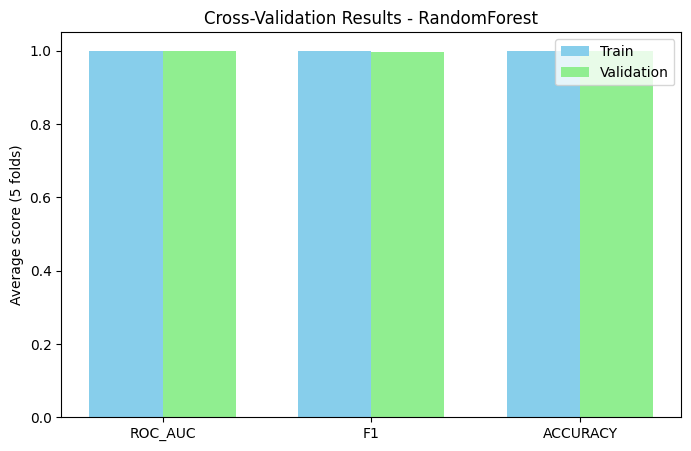

In [9]:
metrics = list(scoring.keys())
train_scores = [cv_results['train_'+m].mean() for m in metrics]
val_scores = [cv_results['test_'+m].mean() for m in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
plt.bar(x + width/2, val_scores, width, label='Validation', color='lightgreen')
plt.xticks(x, [m.upper() for m in metrics])
plt.ylabel('Average score (5 folds)')
plt.title('Cross-Validation Results - RandomForest')
plt.legend()
plt.show()

In [10]:
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluation

In [11]:
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)

# Predictions about the validation game
y_val_pred = rf_model.predict(X_val)
y_val_proba = rf_model.predict_proba(X_val)[:, 1]

# Overall scores
print("\n=== Evaluation of the validation game ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("F1-score :", f1_score(y_val, y_val_pred))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))

# Detailed classification report
print("\n=== Classification report ===")
print(classification_report(y_val, y_val_pred))


=== Evaluation of the validation game ===
Accuracy : 0.9975
F1-score : 0.9939577039274925
ROC-AUC  : 0.9995707374467607

=== Classification report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       0.99      1.00      0.99       329

    accuracy                           1.00      1600
   macro avg       0.99      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



### Confusion matrix (validation)

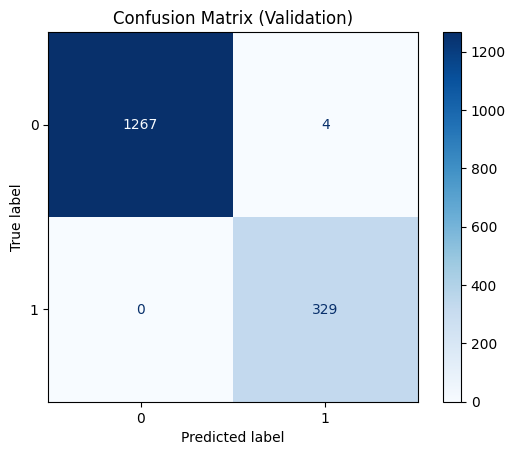

In [12]:
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Validation)")
plt.show()


#### Commentaire :

La variable Complain a été retirée car elle introduisait un biais de fuite d’information (data leakage) : elle est fortement corrélée avec la variable cible Exited, et sa présence faussait l’apprentissage du modèle en lui donnant une information qu’il n’aurait pas dans une situation réelle de prédiction.
En la supprimant, on évalue donc la véritable capacité prédictive du modèle à partir des autres caractéristiques du client.

Donc, à partir d'ici on travaille sans 'Complain'.

#### Drop 'Complain'

In [7]:
# Removal of the highly correlated column
X_train_nocomp = X_train.drop(columns=['Complain'])
X_val_nocomp = X_val.drop(columns=['Complain'])
test_df_nocomp = test_df.drop(columns=['Complain'])

### b) Training without Complain  F1-score : 0.5904761904761905

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, accuracy_score

# Create the RandomForest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_leaf=5,      
    max_features='log2',
    random_state=42,
    class_weight='balanced',
    n_jobs=4  
)

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the metrics
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'accuracy': 'accuracy'
}

# Cross-validation
cv_results = cross_validate(
    rf_model,
    X_train_nocomp,
    y_train,
    cv=cv,
    scoring=scoring,
    n_jobs=4,
    return_train_score=True
)


print("=== Cross-Validation Results ===")
for metric in scoring.keys():
    print(f"{metric} : train mean = {cv_results['train_'+metric].mean():.4f}, "
          f"val mean = {cv_results['test_'+metric].mean():.4f}")


=== Cross-Validation Results ===
roc_auc : train mean = 0.9308, val mean = 0.8521
f1 : train mean = 0.7167, val mean = 0.6187
accuracy : train mean = 0.8732, val mean = 0.8331


### Visualisation des scores de Cross-Validation

C'est aussi le graphe pour visualiser l'overfitting en regardant si il y a un grand écart entre train et validation

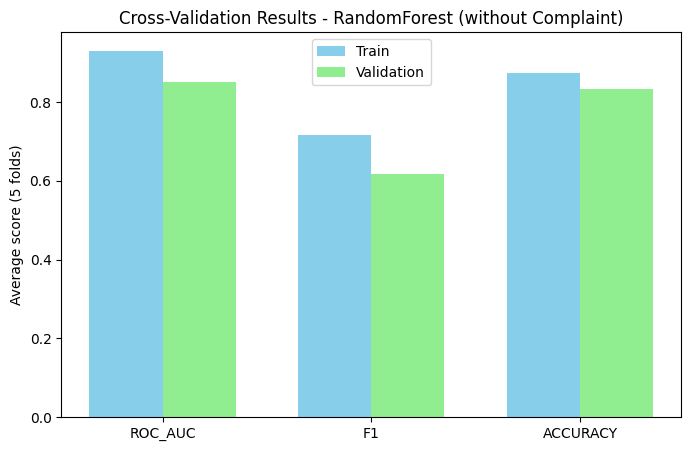

In [15]:
import matplotlib.pyplot as plt
import numpy as np

metrics = list(scoring.keys())
train_scores = [cv_results['train_'+m].mean() for m in metrics]
val_scores = [cv_results['test_'+m].mean() for m in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
plt.bar(x + width/2, val_scores, width, label='Validation', color='lightgreen')
plt.xticks(x, [m.upper() for m in metrics])
plt.ylabel('Average score (5 folds)')
plt.title('Cross-Validation Results - RandomForest (without Complaint)')
plt.legend()
plt.show()


### evaluation of the validation game

In [16]:
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)

rf_model.fit(X_train_nocomp, y_train)

# Predictions
y_val_pred = rf_model.predict(X_val_nocomp)
y_val_proba = rf_model.predict_proba(X_val_nocomp)[:, 1]

print("\n=== Evaluation of the validation game ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("F1-score :", f1_score(y_val, y_val_pred))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))

print("\n=== Classification report ===")
print(classification_report(y_val, y_val_pred))



=== Evaluation of the validation game ===
Accuracy : 0.811875
F1-score : 0.5904761904761905
ROC-AUC  : 0.8578650704636275

=== Classification report ===
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1271
           1       0.53      0.66      0.59       329

    accuracy                           0.81      1600
   macro avg       0.72      0.76      0.73      1600
weighted avg       0.83      0.81      0.82      1600



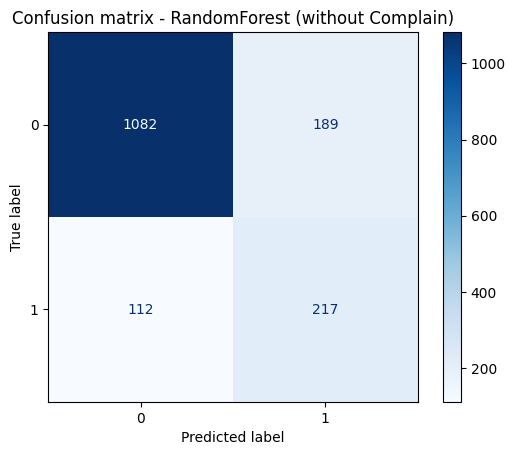

In [17]:
cm = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion matrix - RandomForest (without Complain)")
plt.show()


### c) With SMOTE - F1-score : 0.5533333333333333

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# SMOTE + RandomForest
rf_model_smote = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        min_samples_leaf=5,
        max_features='log2',
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'roc_auc': 'roc_auc', 'f1': 'f1', 'accuracy': 'accuracy'}

cv_results = cross_validate(
    rf_model_smote,
    X_train_nocomp,  
    y_train,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=True
)

print("=== Cross-Validation ===")
for metric in scoring.keys():
    print(f"{metric} : train mean = {cv_results['train_'+metric].mean():.4f}, "
          f"val mean = {cv_results['test_'+metric].mean():.4f}")


=== Cross-Validation ===
roc_auc : train mean = 0.9026, val mean = 0.8384
f1 : train mean = 0.6489, val mean = 0.5556
accuracy : train mean = 0.8700, val mean = 0.8384


In [19]:
rf_model_smote.fit(X_train_nocomp, y_train)

,steps,"[('smote', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,n_estimators,200
,criterion,'gini'
,max_depth,8
,min_samples_split,2


In [21]:
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)

# Evaluation of the validation game
y_val_pred = rf_model_smote.predict(X_val_nocomp)
y_val_proba = rf_model_smote.predict_proba(X_val_nocomp)[:, 1]

print("\n=== Evaluation of the validation game ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("F1-score :", f1_score(y_val, y_val_pred))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))

print("\n=== Classification report ===")
print(classification_report(y_val, y_val_pred))


=== Evaluation of the validation game ===
Accuracy : 0.8325
F1-score : 0.5533333333333333
ROC-AUC  : 0.8462713943739104

=== Classification report ===
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1271
           1       0.61      0.50      0.55       329

    accuracy                           0.83      1600
   macro avg       0.74      0.71      0.73      1600
weighted avg       0.82      0.83      0.83      1600



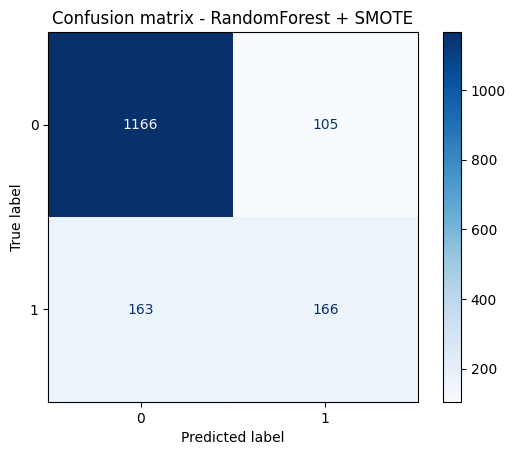

In [22]:
cm_smote = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(cm_smote).plot(cmap='Blues')
plt.title("Confusion matrix - RandomForest + SMOTE")
plt.show()

## test different threshold - F1-score : 0.5928753180661578

J'ai essayer d'améliorer le score en changeant de seuil.

In [23]:

y_val_proba = rf_model_smote.predict_proba(X_val_nocomp)[:, 1]

# Threshold optimization for F1 on the minority class
thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    y_val_pred_t = (y_val_proba >= t).astype(int)
    f1 = f1_score(y_val, y_val_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\nBetter threshold for the minority class: {best_threshold:.2f}")
print(f"F1-corresponding score: {best_f1:.4f}")

# Final predictions with optimized threshold
y_val_pred_opt = (y_val_proba >= best_threshold).astype(int)

print("\n=== Evaluation of the validation game with optimized threshold ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_opt))
print("F1-score :", f1_score(y_val, y_val_pred_opt))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))

print("\n=== Classification report ===")
print(classification_report(y_val, y_val_pred_opt))


Better threshold for the minority class: 0.35
F1-corresponding score: 0.5929

=== Evaluation of the validation game with optimized threshold ===
Accuracy : 0.8
F1-score : 0.5928753180661578
ROC-AUC  : 0.8462713943739104

=== Classification report ===
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1271
           1       0.51      0.71      0.59       329

    accuracy                           0.80      1600
   macro avg       0.71      0.77      0.73      1600
weighted avg       0.83      0.80      0.81      1600



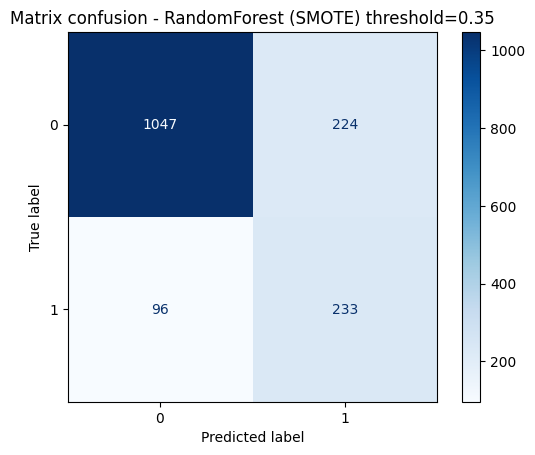

In [24]:
cm = confusion_matrix(y_val, y_val_pred_opt)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title(f"Matrix confusion - RandomForest (SMOTE) threshold={best_threshold:.2f}")
plt.show()

### COmmentaire

J’ai remarqué que le résultat est plutôt bon sans l’équilibrage avec SMOTE, et que le choix du seuil (threshold) influence également la performance du modèle.

# 2- Model XGBoost

Nouvel essai avec le modèle XGBoost :

À ce stade, j’ai choisi d’utiliser XGBoost en raison de sa robustesse, de sa capacité à gérer les relations non linéaires et de ses performances élevées sur les problèmes de classification tabulaires.
Cette fois-ci, j’ai appliqué une recherche d’hyperparamètres avec GridSearchCV, afin d’optimiser les paramètres clés du modèle (comme max_depth, learning_rate, n_estimators, etc.).
L’objectif est d’améliorer le compromis biais-variance et d’obtenir un meilleur pouvoir de généralisation sur les données de validation, en ajustant automatiquement les combinaisons les plus performantes d’hyperparamètres.

### F1-score : 0.6170212765957447

In [25]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, make_scorer
)
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

# Define the model XGBoost
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',  
    scale_pos_weight=1      
)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.5, 1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Define the scorer for the minority class (F1)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV for optimizing hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  
    scoring=f1_scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


In [26]:
# Train the model
random_search.fit(X_train_nocomp, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:02:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:02:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:02:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:02:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:02:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:02:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:02:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:02:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:02:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1.5, subsample=1.0; total time=   2.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1.5, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1.5, subsample=1.0; total time=   1.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   1.1s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   1.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   2.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.3s[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.3s



/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.7; total time=   1.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.7; total time=   1.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.7; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.7; total time=   1.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.7; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.7; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.7; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.7; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   2.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   3.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   3.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   1.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   1.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   1.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   1.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   2.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.1s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.4s



/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   2.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   2.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.8; total time=   1.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.8; total time=   2.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.8; total time=   2.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.8; total time=   1.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   1.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:03:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.7, 0.8, ...], 'gamma': [0, 0.5, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], ...}"
,n_iter,50
,scoring,"make_scorer(f..., pos_label=1)"
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [27]:

# Best parameters
print("Best parameters found:", random_search.best_params_)
print("Best F1-score (CV):", random_search.best_score_)

# Probabilistic predictions on the train to check overfitting
best_xgb = random_search.best_estimator_
y_train_proba = best_xgb.predict_proba(X_train_nocomp)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
best_f1_train = 0
best_threshold_train = 0.5
for t in thresholds:
    y_train_pred_t = (y_train_proba >= t).astype(int)
    f1 = f1_score(y_train, y_train_pred_t)
    if f1 > best_f1_train:
        best_f1_train = f1
        best_threshold_train = t

print("Train F1-score:", best_f1_train)

Best parameters found: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}
Best F1-score (CV): 0.591879262197462
Train F1-score: 0.7644547923942568


In [140]:

scoring = {'roc_auc': 'roc_auc', 'f1': 'f1', 'accuracy': 'accuracy'}

cv_results = cross_validate(
    best_xgb,
    X_train_nocomp,  
    y_train,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=True
)

/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:40:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:40:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:40:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:40:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

In [141]:
print("=== Cross-Validation ===")
for metric in scoring.keys():
    print(f"{metric} : train mean = {cv_results['train_'+metric].mean():.4f}, "
          f"val mean = {cv_results['test_'+metric].mean():.4f}")

=== Cross-Validation ===
roc_auc : train mean = 0.9552, val mean = 0.8505
f1 : train mean = 0.7343, val mean = 0.5919
accuracy : train mean = 0.9077, val mean = 0.8613


In [28]:

y_val_proba = best_xgb.predict_proba(X_val_nocomp)[:, 1]

# Threshold optimization for the minority class
best_f1 = 0
best_threshold = 0.5
for t in thresholds:
    y_val_pred_t = (y_val_proba >= t).astype(int)
    f1 = f1_score(y_val, y_val_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\nBest threshold for minority class: {best_threshold:.2f}")
print(f"F1-score corresponding: {best_f1:.4f}")

y_val_pred_opt = (y_val_proba >= best_threshold).astype(int)

print("\n=== Évaluation sur le jeu de validation avec XGBoost ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_opt))
print("F1-score :", f1_score(y_val, y_val_pred_opt))
print("Precision:", precision_score(y_val, y_val_pred_opt))
print("Recall   :", recall_score(y_val, y_val_pred_opt))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))


Best threshold for minority class: 0.33
F1-score corresponding: 0.6170

=== Évaluation sur le jeu de validation avec XGBoost ===
Accuracy : 0.8425
F1-score : 0.6170212765957447
Precision: 0.6170212765957447
Recall   : 0.6170212765957447
ROC-AUC  : 0.8613876539785106



Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1271
           1       0.62      0.62      0.62       329

    accuracy                           0.84      1600
   macro avg       0.76      0.76      0.76      1600
weighted avg       0.84      0.84      0.84      1600



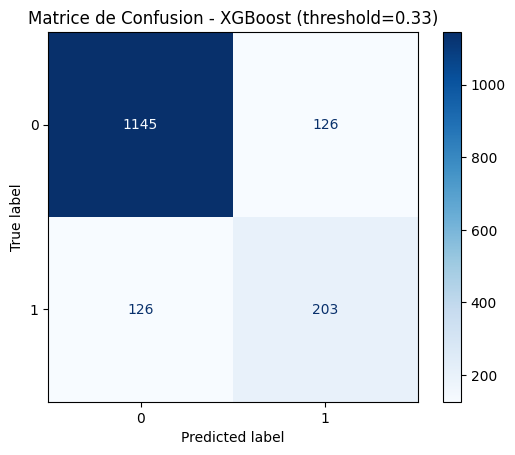

In [29]:
print("\nClassification report:\n", classification_report(y_val, y_val_pred_opt))
cm = confusion_matrix(y_val, y_val_pred_opt)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title(f"Matrice de Confusion - XGBoost (threshold={best_threshold:.2f})")
plt.show()

### Commentaire:

On observe clairement que les résultats obtenus avec XGBoost sont supérieurs, tant en termes de F1-score que de précision et rappel.
Cela s’explique par la capacité de XGBoost à capturer les interactions complexes entre les variables et à réduire le surapprentissage grâce à son mécanisme de régularisation intégré.

# 3- Try another technique (feature engineering)

### Processus opérationnel (workflow résumé)

1. **EDA → identification** des variables candidates (ici `Age` et `NumOfProducts`).  
2. **Feature engineering** sur l’ensemble (ou avant le split si souhaité), création de `AgeGroup`, `LowProducts`, `Age_Products`.  
3. **Encodage** des catégories (`AgeGroup` → Label/One-Hot) en s’assurant d’éviter la fuite (fit sur train, transform sur val/test).  
4. **Sélection finale des features** (on garde ce qui a du sens et améliore la mutual information / importance).  
5. **Modélisation** : entraînement du modèle XGBoost (option : RandomizedSearch/GridSearch pour les hyperparamètres).  
6. **Calibration du seuil** (parcours des seuils et maximisation du F1 pour la classe minoritaire).  
7. **Évaluation** sur validation : F1, précision, rappel, ROC-AUC, matrice de confusion.  
8. **Itération** : si le score n’est pas satisfaisant, retour à l’EDA / création de nouvelles features / ajustement des hyperparamètres / test d’autres modèles.

## a) EDA - Identification of the variable Age and NumOfProducts

##### Analyse exploratoire ciblée :

 Nous examinons la distribution de l’âge et du nombre de produits par rapport à la variable cible Exited. Ces visualisations et statistiques permettent d’identifier des tendances et des interactions potentielles, qui guideront la création de nouvelles features susceptibles d’améliorer la performance finale du modèle.

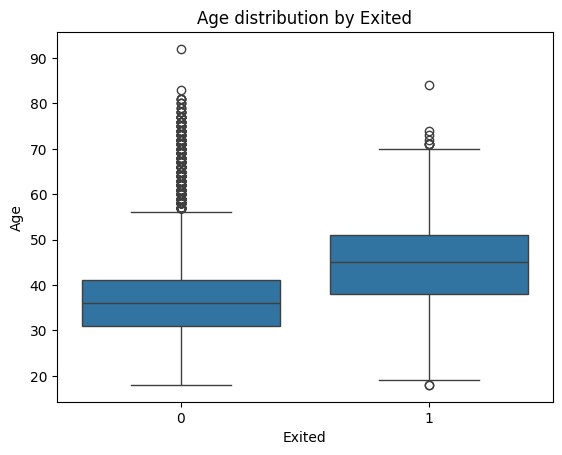

Age statistics by Exited:
         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       6355.0  37.382533  10.160477  18.0  31.0  36.0  41.0  92.0
1       1645.0  44.751368   9.808486  18.0  38.0  45.0  51.0  84.0


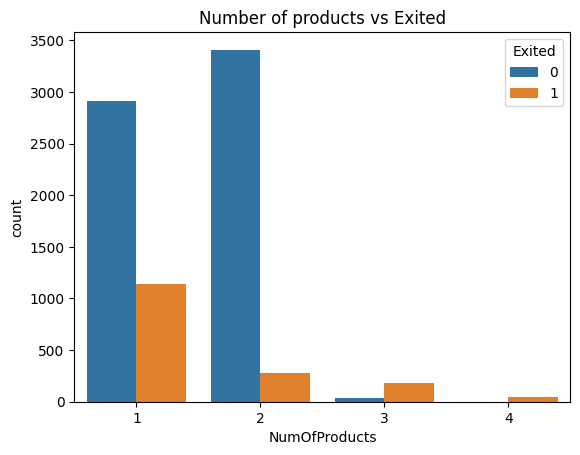

Product distribution by Exited:
Exited            0     1
NumOfProducts            
1              2915  1137
2              3408   282
3                32   181
4                 0    45


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Age vs Exited ---
sns.boxplot(x='Exited', y='Age', data=train_df)
plt.title("Age distribution by Exited")
plt.show()

# Interpretation
age_exited = train_df.groupby('Exited')['Age'].describe()
print("Age statistics by Exited:")
print(age_exited)

# --- NumOfProducts vs Exited ---
sns.countplot(x='NumOfProducts', hue='Exited', data=train_df)
plt.title("Number of products vs Exited")
plt.show()

# Interpretation
numprod_exited = train_df.groupby(['NumOfProducts', 'Exited']).size().unstack(fill_value=0)
print("Product distribution by Exited:")
print(numprod_exited)


### COmmentaire

##### - Analyse des statistiques d’âge selon la variable cible `Exited` : 

On observe que les clients qui ont quitté la banque (Exited=1) ont en moyenne 44,75 ans, soit sensiblement plus âgés que ceux qui restent (Exited=0), dont l’âge moyen est de 37,38 ans. La dispersion est similaire pour les deux groupes (écarts-types ≈ 10 ans). Cela suggère que l’âge peut jouer un rôle discriminant dans le comportement de churn et justifie son inclusion comme feature importante dans le modèle, ainsi que la création de nouvelles variables dérivées de l’âge pour capturer des interactions pertinentes.

#### - Analyse de la distribution du nombre de produits selon `Exited` :

On constate que la majorité des clients qui restent (Exited=0) possèdent 1 ou 2 produits, tandis que ceux qui quittent (Exited=1) présentent une proportion plus élevée de clients avec 3 ou 4 produits. Par exemple, seuls 32 clients fidèles ont 3 produits, contre 181 clients churners. Cela indique que le nombre de produits détenus peut avoir un impact non linéaire sur le churn et justifie la création de nouvelles features comme LowProducts ou des interactions entre Age et NumOfProducts pour améliorer la capacité prédictive du modèle.

## b) Try new feature engineering by adding {'AgeGroup', 'LowProducts', 'Age_Products'} - Model XGBoost

## => A partir d'ici je vais donner les titres par le score F1 obtenu 

### 1. Création de la variable **AgeGroup**

**Principe :**  
Cette étape consiste à découper la variable continue *Age* en tranches d’âge (bins) grâce à une fonction de découpage.  
Chaque intervalle est ensuite étiqueté avec un nom de groupe :  
- **Young (18–30)** → jeunes clients,  
- **Stable (31–40)** → âge moyen, généralement stable,  
- **AtRisk (41–50)** → tranche identifiée comme plus sujette au churn dans l’EDA,  
- **Senior (51–100)** → clients plus âgés, profil potentiellement spécifique.  

**Pourquoi :**  
Cette transformation permet au modèle de capturer les effets **non linéaires** de l’âge.  
Par exemple, si le churn est plus fréquent à partir de 40 ans, *AgeGroup* rend ce seuil explicite.  
Les modèles comme XGBoost peuvent déjà gérer des non-linéarités, mais leur fournir une variable catégorielle bien structurée aide souvent à **converger plus vite** et **mieux généraliser**.

---

### 2. Création de la variable **LowProducts**

**Principe :**  
Cette variable est un **flag binaire (0/1)** indiquant :  
- **1** si le client ne possède qu’un seul produit,  
- **0** sinon.  

**Pourquoi :**  
L’analyse exploratoire a montré que les clients ayant un seul produit sont plus susceptibles de quitter la banque.  
Cette variable traduit une hypothèse métier :  
> “Avoir un faible engagement (peu de produits) = risque accru de churn.”  
C’est une feature simple mais souvent très informative, de type **comportemental**.

---

### 3. Création de la variable d’interaction **Age_Products**

**Principe :**  
Cette variable est le **produit entre l’âge et le nombre de produits**.  
Elle capture ainsi une interaction entre deux dimensions numériques.

**Pourquoi :**  
Elle vise à rendre explicite un **effet combiné** :  
par exemple, un client de 25 ans avec 3 produits ≠ un client de 50 ans avec 3 produits.  
Cela introduit une notion de **maturité financière × engagement**, qui peut influencer la probabilité de churn.  
Ce genre de combinaison améliore souvent la **capacité prédictive** du modèle, surtout pour les algorithmes de boosting.


In [9]:
# --- 1. Age groups ---
train_df['AgeGroup'] = pd.cut(
    train_df['Age'],
    bins=[18, 30, 40, 50, 100],
    labels=['Young', 'Stable', 'AtRisk', 'Senior']
)

X_val_nocomp['AgeGroup'] = pd.cut(
    X_val_nocomp['Age'],
    bins=[18, 30, 40, 50, 100],
    labels=['Young', 'Stable', 'AtRisk', 'Senior']
)

# --- 2. Low product flag ---
train_df['LowProducts'] = (train_df['NumOfProducts'] == 1).astype(int)
X_val_nocomp['LowProducts'] = (X_val_nocomp['NumOfProducts'] == 1).astype(int)

# --- 3. Age x NumOfProducts interaction ---
train_df['Age_Products'] = train_df['Age'] * train_df['NumOfProducts']
X_val_nocomp['Age_Products'] = X_val_nocomp['Age'] * X_val_nocomp['NumOfProducts']

# --- Quick check ---
print("Preview of new features in the training set:")
print(train_df[['Age', 'NumOfProducts', 'AgeGroup', 'LowProducts', 'Age_Products']].head())

print("\nPreview of new features in the validation set:")
print(X_val_nocomp[['Age', 'NumOfProducts', 'AgeGroup', 'LowProducts', 'Age_Products']].head())


Preview of new features in the training set:
   Age  NumOfProducts AgeGroup  LowProducts  Age_Products
0   32              2   Stable            0            64
1   42              2   AtRisk            0            84
2   24              1    Young            1            24
3   27              1    Young            1            27
4   56              1   Senior            1            56

Preview of new features in the validation set:
      Age  NumOfProducts AgeGroup  LowProducts  Age_Products
6843   41              2   AtRisk            0            82
4072   25              1    Young            1            25
6614   31              1   Stable            1            31
6974   50              2   AtRisk            0           100
4372   27              2    Young            0            54


| Nouvelle Feature | Type         | Objectif                         | Intuition                                      |
| ---------------- | ------------ | -------------------------------- | ---------------------------------------------- |
| **AgeGroup**     | Catégorielle | Capter la non-linéarité de l’âge | Certains groupes d’âge quittent plus la banque |
| **LowProducts**  | Binaire      | Identifier faible engagement     | 1 produit = risque élevé de churn              |
| **Age_Products** | Numérique    | Interaction âge × engagement     | Un jeune très équipé ≠ un senior très équipé   |


Mutual Information Scores (Feature Predictive Power):
Complain           0.497911
Age_Products       0.077768
Age                0.067141
NumOfProducts      0.066404
AgeGroup           0.046121
LowProducts        0.019242
IsActiveMember     0.015850
Balance            0.013011
Geography          0.011343
Gender             0.009248
CreditScore        0.007634
Tenure             0.005695
EstimatedSalary    0.003595
CustomerId         0.002045
HasCrCard          0.000000
Card Type          0.000000
dtype: float64


/tmp/ipykernel_14017/988185017.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi.values, y=mi.index, palette='coolwarm')


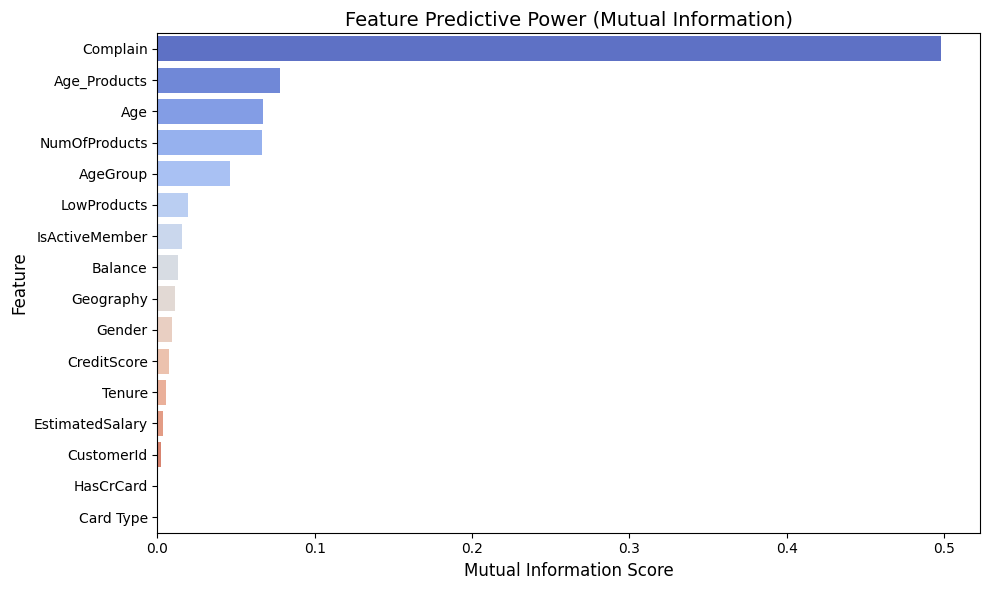

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# === 1. Create new features ===
def add_features(df):
    # Age groups
    df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 100], labels=['Young', 'Stable', 'AtRisk', 'Senior'])
    
    # Low product flag
    df['LowProducts'] = (df['NumOfProducts'] == 1).astype(int)
    
    # Age x NumOfProducts interaction
    df['Age_Products'] = df['Age'] * df['NumOfProducts']
    return df

train_df = add_features(train_df)
X_val_nocomp = add_features(X_val_nocomp)

# === 2. Prepare for mutual information ===
X = train_df.drop(columns=['Exited'])
y = train_df['Exited'].copy()

# Encode categorical columns
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# === 3. Compute predictive power ===
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Mutual Information Scores (Feature Predictive Power):")
print(mi)

# === 4. Plot feature importance ===
plt.figure(figsize=(10,6))
sns.barplot(x=mi.values, y=mi.index, palette='coolwarm')
plt.title("Feature Predictive Power (Mutual Information)", fontsize=14)
plt.xlabel("Mutual Information Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


## 1- F1-score : 0.6214511041009464

#### 1. Feature engineering

Création de nouvelles variables pour améliorer la **capacité prédictive** :  
- **AgeGroup** : tranches d’âge (Young, Stable, AtRisk, Senior).  
- **LowProducts** : indicateur si le client possède seulement 1 produit.  
- **Age_Products** : interaction entre âge et nombre de produits.  

Ces features capturent des **relations non linéaires** et des **interactions potentielles** avec le churn.

---

#### 2. Préparation des données

- Sélection des **features pertinentes** pour le modèle.  
- **Encodage** des variables catégorielles (AgeGroup).  
- **Séparation** en train et validation avec dimensions cohérentes.

---

#### 3. Modélisation XGBoost

- Définition du modèle et exploration des hyperparamètres via **RandomizedSearchCV**.  
- Utilisation du **F1-score** pour privilégier la détection de la **classe minoritaire** (churners).

---

#### 4. Optimisation du seuil de classification

- Conversion des probabilités en classes binaires avec le **seuil qui maximise le F1-score**.  
- Ajustement spécifique à la classe minoritaire pour améliorer **recall** et **F1**.


In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, make_scorer
)

In [12]:
# === 0. Création de copies pour XGBoost ===
X_train_xgb = X_train_nocomp.copy()
X_val_xgb = X_val_nocomp.copy()
test_df_xgb = test_df_nocomp.copy()

# --- 1. Create new features directly in X_train_xgb and X_val_xgb ---
X_train_xgb['AgeGroup'] = pd.cut(
    X_train_xgb['Age'],
    bins=[18, 30, 40, 50, 100],
    labels=['Young', 'Stable', 'AtRisk', 'Senior']
)

X_val_xgb['AgeGroup'] = pd.cut(
    X_val_xgb['Age'],
    bins=[18, 30, 40, 50, 100],
    labels=['Young', 'Stable', 'AtRisk', 'Senior']
)

X_train_xgb['LowProducts'] = (X_train_xgb['NumOfProducts'] == 1).astype(int)
X_val_xgb['LowProducts'] = (X_val_xgb['NumOfProducts'] == 1).astype(int)

X_train_xgb['Age_Products'] = X_train_xgb['Age'] * X_train_xgb['NumOfProducts']
X_val_xgb['Age_Products'] = X_val_xgb['Age'] * X_val_xgb['NumOfProducts']

print("New columns added:",
      set(X_train_xgb.columns) & {'Age_Products', 'AgeGroup', 'LowProducts'})

# --- 2. Final feature selection ---
selected_features = [
    'Age_Products', 'Age', 'NumOfProducts', 'AgeGroup', 'LowProducts',
    'IsActiveMember', 'Balance', 'CreditScore', 'Tenure', 'EstimatedSalary'
]

# --- 3. Encode the categorical column AgeGroup ---
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train_xgb['AgeGroup'] = le.fit_transform(X_train_xgb['AgeGroup'].astype(str))
X_val_xgb['AgeGroup'] = le.transform(X_val_xgb['AgeGroup'].astype(str))

# --- 4. Final extraction ---
X_train_final = X_train_xgb[selected_features].copy()
X_val_final = X_val_xgb[selected_features].copy()
y_train_final = y_train.copy()
y_val_final = y_val.copy()

print("Final dimensions:", X_train_final.shape, X_val_final.shape)
print("Final columns:", X_train_final.columns.tolist())


New columns added: {'LowProducts', 'AgeGroup', 'Age_Products'}
Final dimensions: (6400, 10) (1600, 10)
Final columns: ['Age_Products', 'Age', 'NumOfProducts', 'AgeGroup', 'LowProducts', 'IsActiveMember', 'Balance', 'CreditScore', 'Tenure', 'EstimatedSalary']


In [18]:

# === 2. Define the XGBoost model ===
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=1
)

# === 3. Hyperparameter grid ===
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.5, 1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# === 4. Scorer for the minority class ===
f1_scorer = make_scorer(f1_score, pos_label=1)

# === 5. Cross-validation ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === 6. RandomizedSearchCV ===
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring=f1_scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


In [19]:
# === 7. Training ===
random_search.fit(X_train_xgb, y_train)

# === 8. Best parameters and CV F1-score ===
print("Best parameters found:", random_search.best_params_)
print("Best F1-score (CV):", random_search.best_score_)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1.5, subsample=1.0; total time=   2.1s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1.5, subsample=1.0; total time=   2.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1.5, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1.5, subsample=1.0; total time=   3.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=1.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   1.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   1.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   1.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   2.4s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.7; total time=   1.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.7; total time=   1.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.7; total time=   2.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.7; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.7; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.7; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.7; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.7; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.7; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   2.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   3.1s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   4.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   4.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   1.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   1.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   1.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   2.1s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.1s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   2.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   2.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   2.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   1.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   1.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.1s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:48:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.1s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.6s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.8; total time=   1.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.8; total time=   2.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.8; total time=   4.4s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.5, reg_lambda=1.5, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   1.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   1.0s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   1.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.3s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0.5, reg_lambda=2, subsample=0.8; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   2.5s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   0.7s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.8s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.7; total time=   0.9s


/home/aidan/miniconda3/envs/MLproject/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [18:49:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}
Best F1-score (CV): 0.59296367997873


In [20]:
# === 9. Probabilistic predictions on the train set to optimize threshold ===
best_xgb = random_search.best_estimator_
y_train_proba = best_xgb.predict_proba(X_train_xgb)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
best_f1_train = 0
best_threshold_train = 0.5
for t in thresholds:
    y_train_pred_t = (y_train_proba >= t).astype(int)
    f1 = f1_score(y_train, y_train_pred_t)
    if f1 > best_f1_train:
        best_f1_train = f1
        best_threshold_train = t

print("Train F1-score:", best_f1_train)

# === 10. Predictions on the validation set using optimized threshold ===
y_val_proba = best_xgb.predict_proba(X_val_xgb)[:, 1]

best_f1 = 0
best_threshold = 0.5
for t in thresholds:
    y_val_pred_t = (y_val_proba >= t).astype(int)
    f1 = f1_score(y_val, y_val_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\nBest threshold for minority class: {best_threshold:.2f}")
print(f"F1-score corresponding: {best_f1:.4f}")

y_val_pred_opt = (y_val_proba >= best_threshold).astype(int)

# === 11. Final evaluation ===
print("\n=== Evaluation on the validation set with XGBoost ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_opt))
print("F1-score :", f1_score(y_val, y_val_pred_opt))
print("Precision:", precision_score(y_val, y_val_pred_opt))
print("Recall   :", recall_score(y_val, y_val_pred_opt))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))


Train F1-score: 0.770702981229297

Best threshold for minority class: 0.36
F1-score corresponding: 0.6215

=== Evaluation on the validation set with XGBoost ===
Accuracy : 0.85
F1-score : 0.6214511041009464
Precision: 0.6459016393442623
Recall   : 0.5987841945288754
ROC-AUC  : 0.8637240858142476



Classification report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1271
           1       0.65      0.60      0.62       329

    accuracy                           0.85      1600
   macro avg       0.77      0.76      0.76      1600
weighted avg       0.85      0.85      0.85      1600



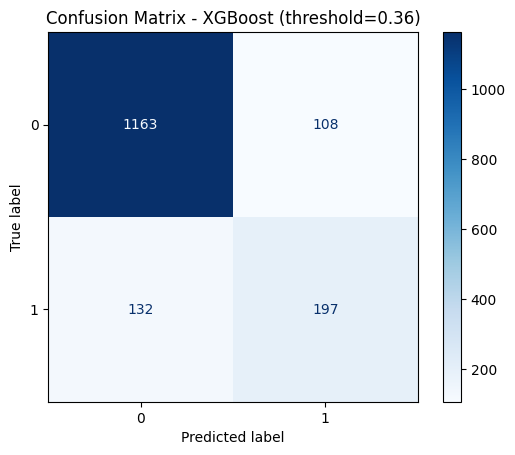

In [21]:
# === 12. Classification report and confusion matrix ===
print("\nClassification report:\n", classification_report(y_val, y_val_pred_opt))
cm = confusion_matrix(y_val, y_val_pred_opt)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title(f"Confusion Matrix - XGBoost (threshold={best_threshold:.2f})")
plt.show()

# XGBoost Model
ratio = y_train_final.value_counts()[0] / y_train_final.value_counts()[1]

xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=ratio
)

# Final hyperparameters tested
param_dist = {
    'n_estimators': [300, 400, 500],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.03, 0.05, 0.07],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.3],
    'reg_lambda': [1, 1.5, 2]
}

f1_scorer = make_scorer(f1_score, pos_label=1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  RandomizedSearchCV 

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring=f1_scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


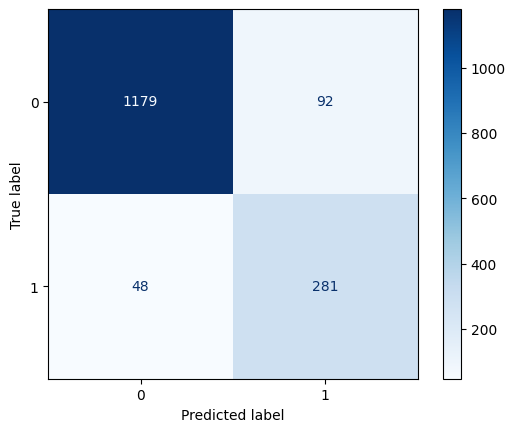

In [79]:
cm = confusion_matrix(y_val_final, y_val_pred_opt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()